#1.Introduction


# **ChurnPulse: Customer Churn Prediction**
Customer Churn refers to the phenomenon where customers stop doing business with a company or service over a given period. It is often expressed as a percentage of customers lost during a specific time frame. Churn is a critical metric for businesses as it directly impacts revenue and customer lifetime value

---

## **Overview**
Customer churn is a critical challenge for telecom companies, impacting revenue and customer retention. This project, **ChurnPulse**, focuses on predicting whether a customer is likely to churn using the **Telco Customer Churn** dataset. By leveraging machine learning and data analysis, the goal is to gain actionable insights to enhance customer retention strategies.

---

## **Objective**
The primary objective of **ChurnPulse** is to develop a machine learning model that can predict whether a customer is likely to churn based on their demographic, account, and service usage data.

---

## **Steps in the Project**
1. **Data Understanding:**  
   - Analyze the dataset to understand customer profiles and identify trends.  

2. **Data Preprocessing:**  
   - Handle missing values and outliers.  
   - Encode categorical variables and scale numerical features.  

3. **Exploratory Data Analysis (EDA):**  
   - Visualize relationships between features and churn.  
   - Identify key drivers of churn.  

4. **Model Development:**  
   - Train and evaluate multiple machine learning models (e.g., Logistic Regression, Random Forest, etc.).  
   - Compare model performance using metrics like accuracy, precision, recall, and F1 score.  

5. **Insights & Recommendations:**  
   - Highlight key factors contributing to churn.  
   - Propose actionable strategies to improve customer retention (e.g., targeted offers, personalized services).

---

## **Why ChurnPulse?**
**ChurnPulse** aims to provide:  
- Early detection of customers likely to churn.  
- Insights to design proactive retention strategies.  
- Enhanced customer satisfaction and reduced revenue loss for telecom companies.  
---

Let’s dive into the analysis and start building the predictive model for **ChurnPulse**!


#2.loading libraries & Dataset

In [ ]:
#importing libraries for mathematical imputation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing sklearn libraries required for Logistic regression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score
from sklearn.metrics import roc_curve,roc_auc_score


In [ ]:
#loading dataset
df=pd.read_csv('/content/Churn.csv')

#3.Understanding the data

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Dataset Description**

The **Telco Customer Churn** dataset contains information about customers of a telecom company, including details about their churn status, services used, account information, and demographics. Below are the key components:

### **1. Churn Information**
- **Churn:** Indicates whether the customer left the company in the last month (`Yes` or `No`). This is the target variable for prediction.

### **2. Services Signed Up**
Details about the services customers have subscribed to:
- **Phone Service** and **Multiple Lines**: Subscriptions to phone services and multiple phone lines.
- **Internet Service**: Internet connection type (DSL, Fiber optic, or None).
- **Add-ons**: Online security, online backup, device protection, tech support, streaming TV, and streaming movies.

### **3. Customer Account Information**
- **Tenure**: Duration of the customer relationship (in months).
- **Contract Type**: Month-to-month, One year, or Two-year contracts.
- **Billing Preferences**: Payment method, paperless billing status, and monthly charges.
- **Total Charges**: Total amount charged to the customer.

### **4. Demographic Information**
- **Gender**: Male or Female.
- **Senior Citizen**: Whether the customer is a senior citizen.
- **Partner and Dependents**: If the customer has a partner or dependents.

This dataset is ideal for understanding customer behavior and identifying patterns associated with churn, enabling actionable strategies to reduce customer turnover.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.isnull().mean()

,0
customerID,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


#4. Data Manupulation

In [ ]:
#droping coustomer id column as it is not required
df = df.drop('customerID', axis=1)

In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


it can also be noticed that Tenure column is o for these enteries evn though the MonthlyCharges column is not empty

In [ ]:
df[df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Lets delete the rows with missing values in the Tenure column.
as there is only 11 rows so that it will no affect the data

In [ ]:
df.drop(labels=df[df['tenure']==0].index,axis=0,inplace=True)

In [ ]:
df[df['tenure']==0].index

Index([], dtype='int64')

In [ ]:
#Fill th emissing values in the Total charges by the method of mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [ ]:
df['SeniorCitizen']=df['SeniorCitizen'].map({0:"NO",1:"Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,NO,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,NO,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,NO,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,NO,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,NO,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['InternetService'].describe(include=['object','bool'])

,InternetService
count,7032
unique,3
top,Fiber optic
freq,3096


In [ ]:
df['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2416
No,1520


In [ ]:
numerical_cols = ['tenure','MonthlyCharges','TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


#6.Data Visualization

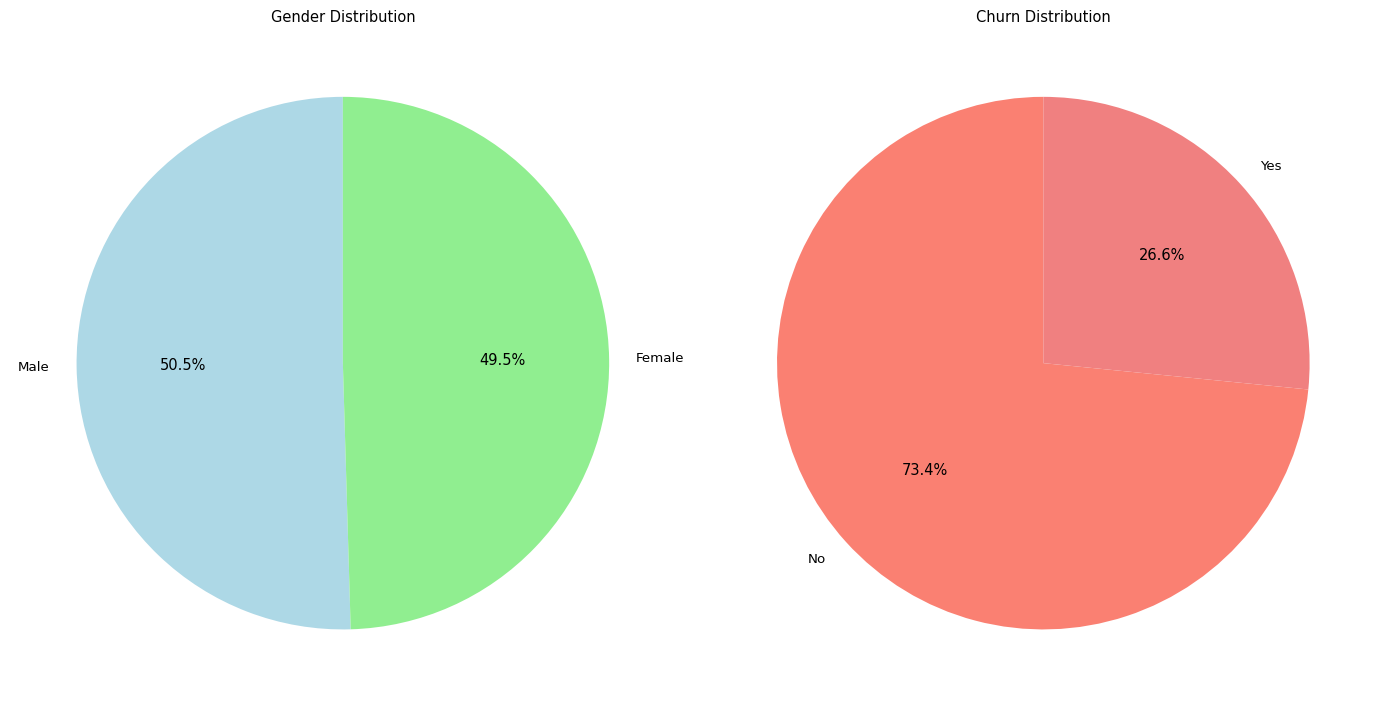

In [ ]:
# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for Gender distribution
gender_counts = df['gender'].value_counts()
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
axes[0].set_title('Gender Distribution')

# Pie chart for Churn distribution
churn_counts = df['Churn'].value_counts()
axes[1].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['salmon', 'lightcoral'])
axes[1].set_title('Churn Distribution')

# Display the charts
plt.tight_layout()
plt.show()


26% of customers switched to another firm

Customers are 49% female and 50.5% male

In [ ]:
# Customer contract distribution
fig = px.histogram(df,x='Churn',color='Contract',title='Customer Contract Distribution')
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

Churn No:

43 % coustomers choose month-to-month

26% coustomers choose one-year

31 % coustomers choose Two- year

---
Churn Yes:

89 % coustomers choose month-to-month

8 % coustomers choose one-year

2% coustomers choose two-year

In [ ]:
#Payment method distribution
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text='Payment Method Distribution')
fig.show()

In [ ]:
#customer payment Method distribution
fig = px.histogram(df,x='Churn',color='PaymentMethod',title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

Major customers who moved out were having Electronic Check as Payment Method.

Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [ ]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
df[df["gender"]=="Male"][["InternetService","Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,992
Fiber optic,No,910
No,No,717
Fiber optic,Yes,633
DSL,Yes,240
No,Yes,57


In [ ]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,965
Fiber optic,No,889
No,No,690
Fiber optic,Yes,664
DSL,Yes,219
No,Yes,56


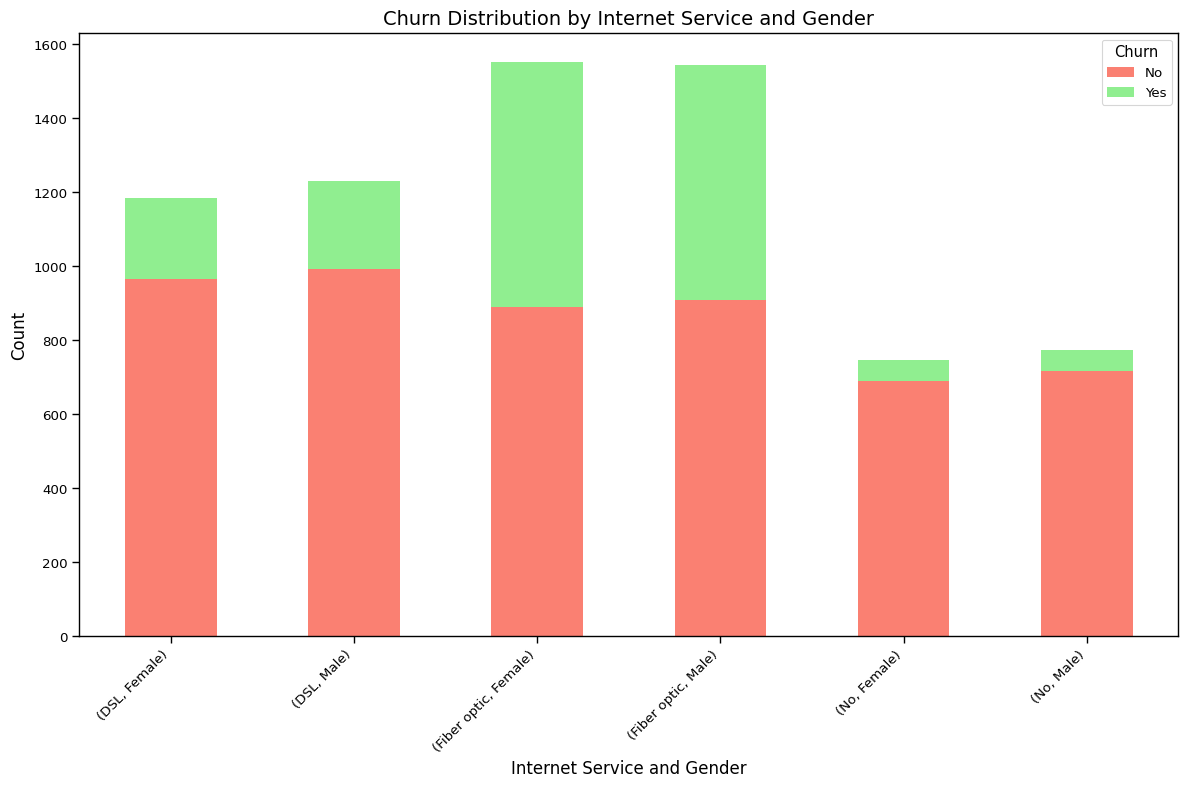

In [ ]:
# Group data by InternetService, Gender, and Churn
grouped_data = df.groupby(['InternetService', 'gender', 'Churn']).size().unstack()

# Plot the data
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8), color=['salmon', 'lightgreen'])

# Add labels and title
plt.title('Churn Distribution by Internet Service and Gender', fontsize=14)
plt.xlabel('Internet Service and Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()


A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.

Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


Customers without dependents are more likely to churn

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers that doesn't have partners are more likely to churn

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


It can be observed that the fraction of senior citizen is very less.

Most of the senior citizens churn.


In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


Most customers churn in the absence of online security,

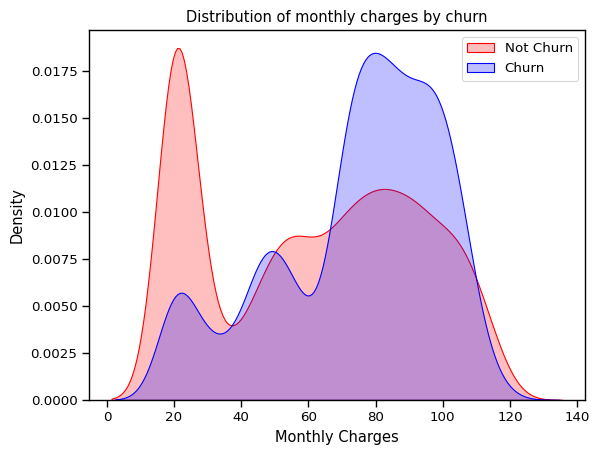

In [ ]:

sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

Customers with higher Monthly Charges are also more likely to churn

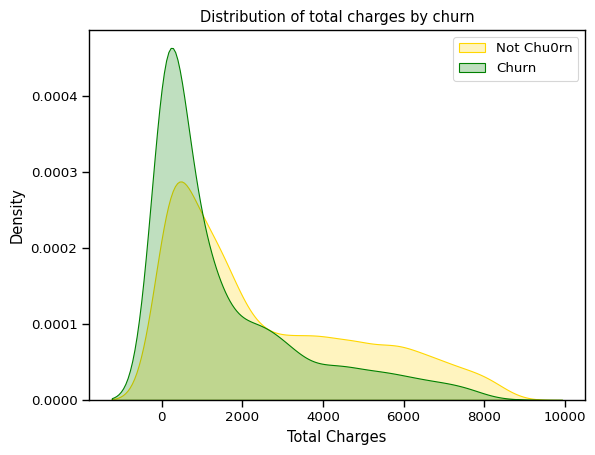

In [ ]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [ ]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()


# 5.Data Preprocessing

In [140]:
# Fitting and saving the LabelEncoder for each categorical column

encoders = {}

# Assuming these are your categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                       'PaymentMethod']

# Create and fit LabelEncoders for each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    # Fit the encoder to the unique values of the column in the training data
    le.fit(df[col])  # Assume `training_data` is the DataFrame of your training data
    encoders[col] = le

# Save the encoders to a pickle file
with open('encoder.pkl', 'wb') as encoder_file:
    pickle.dump(encoders, encoder_file)


In [ ]:
df = df.apply(lambda x: object_to_int(x))

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
plt.figure(figsize=(10,8))
df.corr()['Churn'].sort_values(ascending=False)

,Churn
Churn,1.000000
MonthlyCharges,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
PaymentMethod,0.107852
MultipleLines,0.038043
PhoneService,0.011691
gender,-0.008545
StreamingTV,-0.036303
StreamingMovies,-0.038802


<Figure size 1000x800 with 0 Axes>

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 40 ,stratify=y)

In [ ]:
def distplot(feature,frame,color='r'):
  plt.figure(figsize=(8,3))
  plt.title("Distribution for {}".format(feature))
  ax = sns.distplot(frame[feature],color=color)
  plt.show()

In [ ]:
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

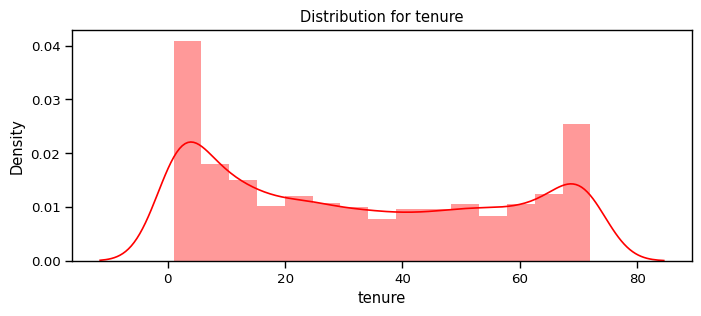

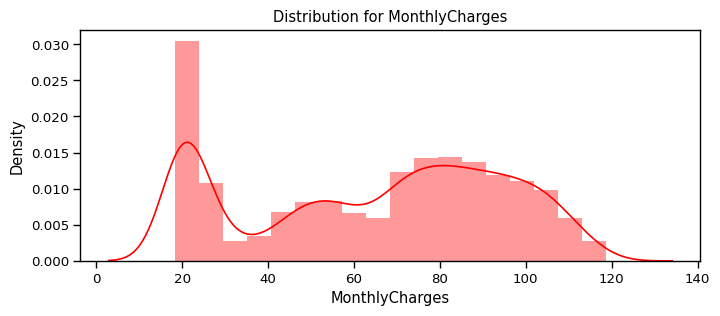

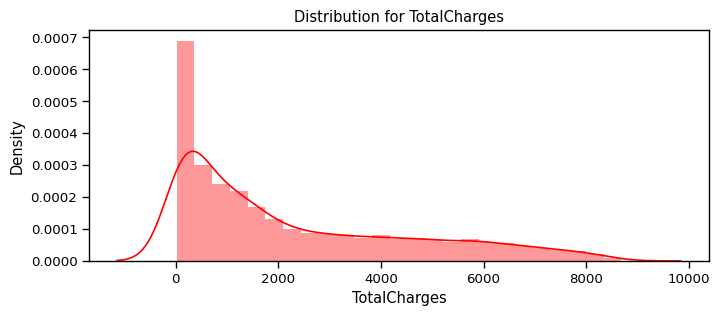

In [ ]:
for feat in numerical_cols:
  distplot(feat,df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

Standardizing numeric attributes

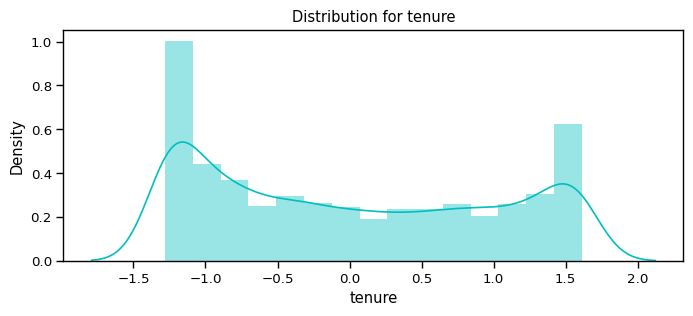

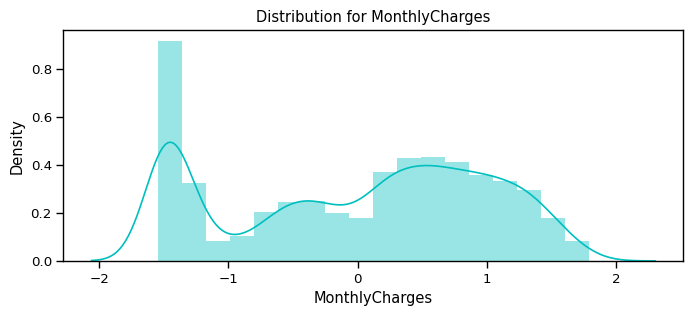

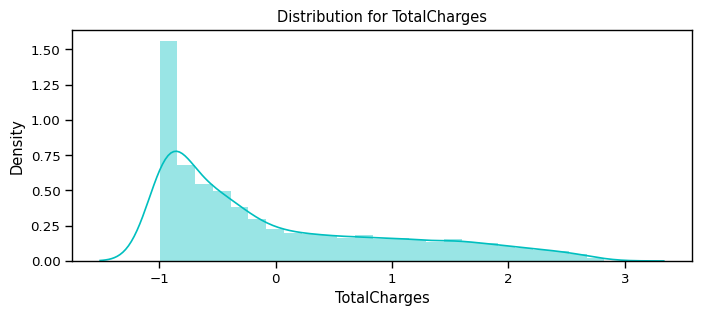

In [ ]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[numerical_cols].astype('float64')),
                       columns=numerical_cols)
for feat in numerical_cols:
  distplot(feat,df_std,color='c')

In [ ]:
#those that need one hot encoding
cat_cols_ohe = ['PaymentMethod','Contract','InternetService']
#those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)-set(numerical_cols)-set(cat_cols_ohe))


In [ ]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

#Machine Learning Model Evaluations and Predictions

Logistic Regression

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [ ]:
accuracy_score(y_test,logistic.predict(X_test))

0.8090047393364929

In [ ]:
logistic_pred = logistic.predict(X_test)

In [ ]:
report = classification_report(y_test,logistic_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.80      2110



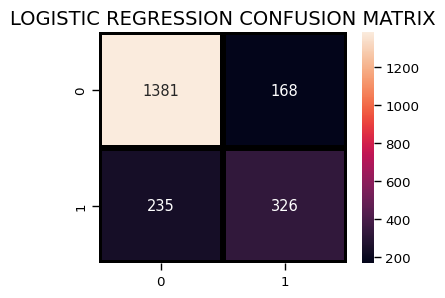

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, logistic_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

ROC curve

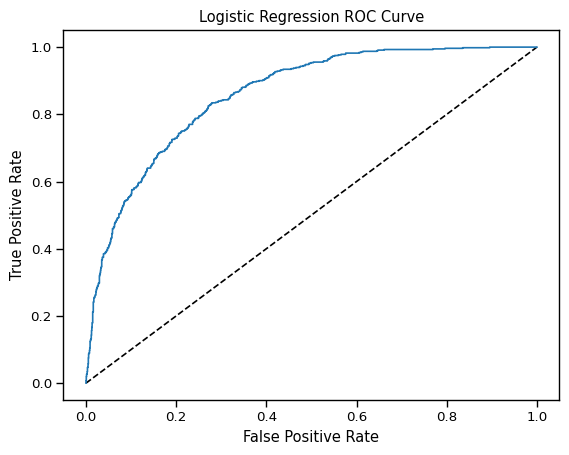

In [ ]:
y_pred_prob = logistic.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

#Loading the models using pickle

In [ ]:
import pickle

with open('logistic.pkl', 'wb') as file:
    pickle.dump(logistic, file)

with open('logistic_scaler.pkl','wb') as file:
    pickle.dump(scaler,  file)

#Loading the Scaler and Model:

In [ ]:
#Loading the Scaler and Model:
with open('logistic.pkl', 'rb') as file:
    logistic = pickle.load(file)

with open('logistic_scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

#Prediction for new data

In [ ]:
# Sample data for testing
new_data = pd.DataFrame({
    'gender': ['Male'],
    'SeniorCitizen': [0],
    'Partner': ['Yes'],
    'Dependents': ['No'],
    'tenure': [45],
    'PhoneService': ['Yes'],
    'MultipleLines': ['No'],
    'InternetService': ['DSL'],
    'OnlineSecurity': ['Yes'],
    'OnlineBackup': ['No'],
    'DeviceProtection': ['Yes'],
    'TechSupport': ['Yes'],
    'StreamingTV': ['No'],
    'StreamingMovies': ['Yes'],
    'Contract': ['One year'],
    'PaperlessBilling': ['Yes'],
    'PaymentMethod': ['Mailed check'],
    'MonthlyCharges': [70.0],
    'TotalCharges': [3150.0],
})

In [ ]:
#Label encoding for numerical cols
le = LabelEncoder()
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                       'PaymentMethod']
for col in categorical_columns:
  new_data[col] = le.fit_transform(new_data[col])

# Scale the numerical cols
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
new_data[numerical_cols] = scaler.transform(new_data[numerical_cols])

# Make prediction using the trained model
prediction = logistic.predict(new_data)

In [ ]:
print(f"Prediction for new customer: {'Churn' if prediction[0] == 1 else 'No Churn'}")

Prediction for new customer: No Churn
